<a href="https://colab.research.google.com/github/kungfumas/mesin-belajar/blob/master/pycaretiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install pycaret pandas shap

In [29]:
import pandas as pd
from pycaret.classification import *

In [30]:
columns = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=columns)

In [31]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['class']= label_encoder.fit_transform(df['class'])
 
df['class'].unique()

array([0, 1, 2])

In [34]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
cat_features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

In [36]:
experiment = setup(df, target='class', categorical_features=cat_features)

,Description,Value
0,session_id,5318
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(150, 5)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9236,0.9742,0.9222,0.9341,0.9227,0.8845,0.8903,0.339
et,Extra Trees Classifier,0.9236,0.9826,0.9222,0.9383,0.9231,0.8842,0.8919,0.515
ridge,Ridge Classifier,0.9227,0.0000,0.9250,0.9391,0.9211,0.8839,0.8930,0.021
nb,Naive Bayes,0.9127,0.9491,0.9167,0.9308,0.9111,0.8695,0.8794,0.033
gbc,Gradient Boosting Classifier,0.9127,0.9819,0.9167,0.9311,0.9109,0.8687,0.8791,0.416
dt,Decision Tree Classifier,0.8864,0.9140,0.8917,0.9140,0.8860,0.8286,0.8422,0.029
rf,Random Forest Classifier,0.8864,0.9831,0.8861,0.9091,0.8862,0.8275,0.8394,0.605
knn,K Neighbors Classifier,0.8836,0.9525,0.8861,0.9113,0.8812,0.8253,0.8398,0.120
svm,SVM - Linear Kernel,0.8745,0.0000,0.8778,0.8982,0.8714,0.8112,0.8249,0.078
ada,Ada Boost Classifier,0.6564,0.8151,0.6250,0.5226,0.5522,0.4593,0.5682,0.205


In [44]:
prediksi=predict_model(best_model, df.tail())

In [45]:
ytest=prediksi['class']
yprediksi=prediksi['Label']

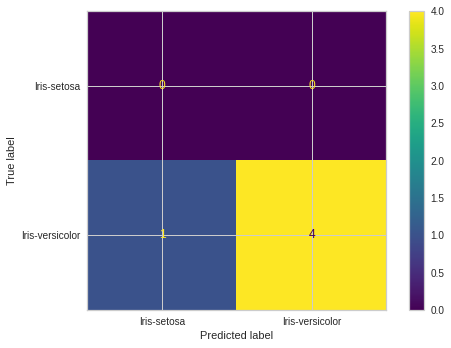

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest, yprediksi)
ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_).plot()

In [41]:
#print(classification_report(ytest, yprediksi, target_names=label_encoder.classes_))

In [48]:
save_model(best_model, model_name='iris_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['sepal-length',
                                                             'sepal-width',
                                                             'petal-length',
                                                             'petal-width'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
         

In [49]:
model = load_model('iris_model')

Transformation Pipeline and Model Successfully Loaded


In [50]:
model.predict(df.tail())

array([2, 2, 2, 0, 2])

In [51]:
df.tail

<bound method NDFrame.tail of      sepal-length  sepal-width  petal-length  petal-width  class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]>